In [1]:
'''
Image Alignment
'''

'''
Theory

-> A Homography transforms a square to arbitrary quad
-> Images of two planes are related by a homography
-> We need 4 corresponding points to estimate Homography
'''



'\nTheory\n\n-> A Homography transforms a square to arbitrary quad\n-> Images of two planes are related by a homography\n-> We need 4 corresponding points to estimate Homography\n'

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image



In [18]:
# Step 1:
'''
Read the template and scanned images
'''

refFilename = 'form.jpg'
print("Reading reference images: ", refFilename )

im1 = cv2.imread(refFilename, cv2.IMREAD_COLOR)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)


Image(filename=refFilename)


# Read the image to be aligned

# Read scanned image
imFilename = "scanned-form.jpg"
print(f"Reading iamge to be aligned: {imFilename}")

im2 = cv2.imread(imFilename, cv2.IMREAD_COLOR)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

Image(filename=imFilename)




Reading reference images:  form.jpg
Reading iamge to be aligned: scanned-form.jpg


Text(0.5, 1.0, 'Scanned copy')

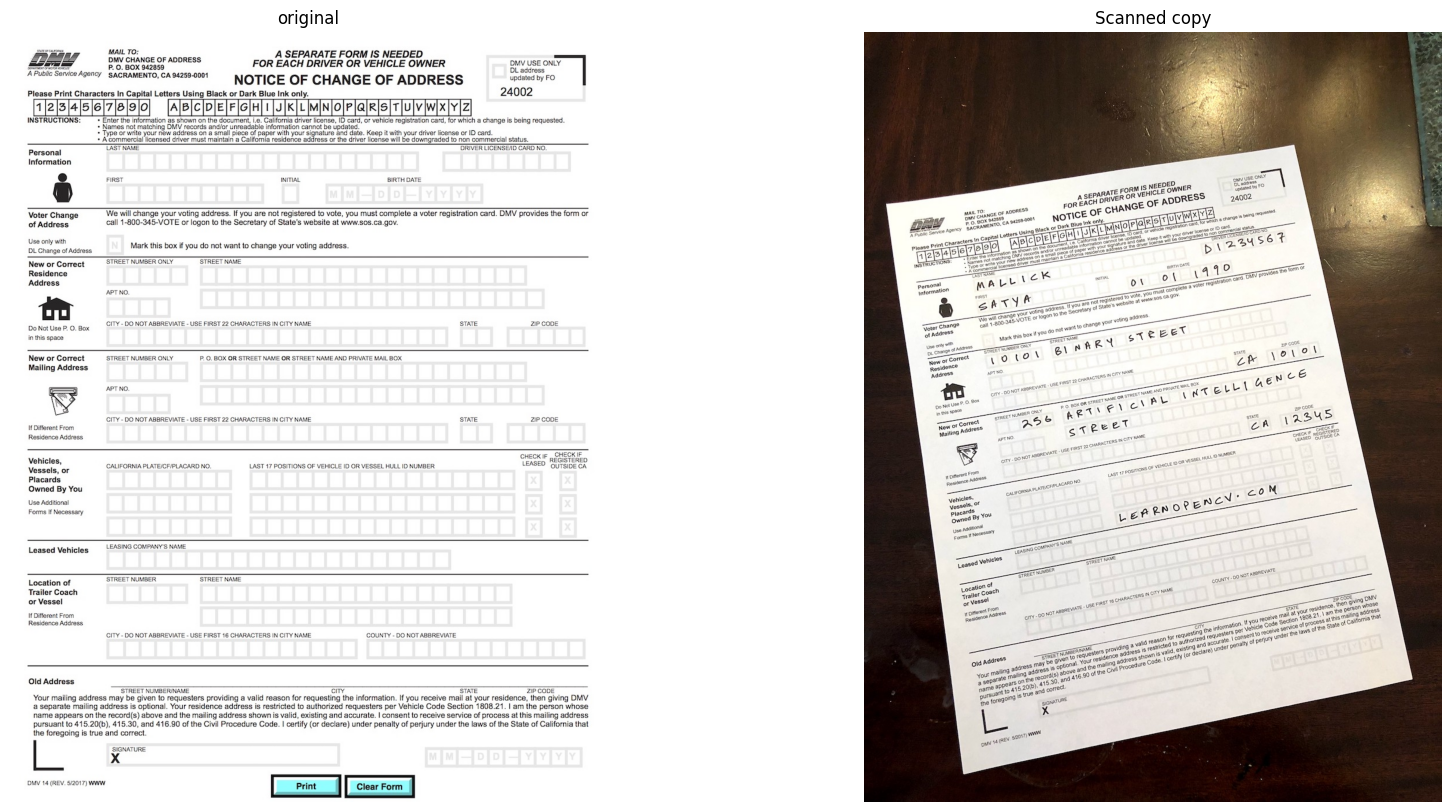

In [4]:


plt.figure(figsize=[20,10])

plt.subplot(121)
plt.axis('off')
plt.imshow(im1)
plt.title("original")

plt.subplot(122)
plt.axis('off')
plt.imshow(im2)
plt.title("Scanned copy")



Text(0.5, 1.0, 'Scanned form')

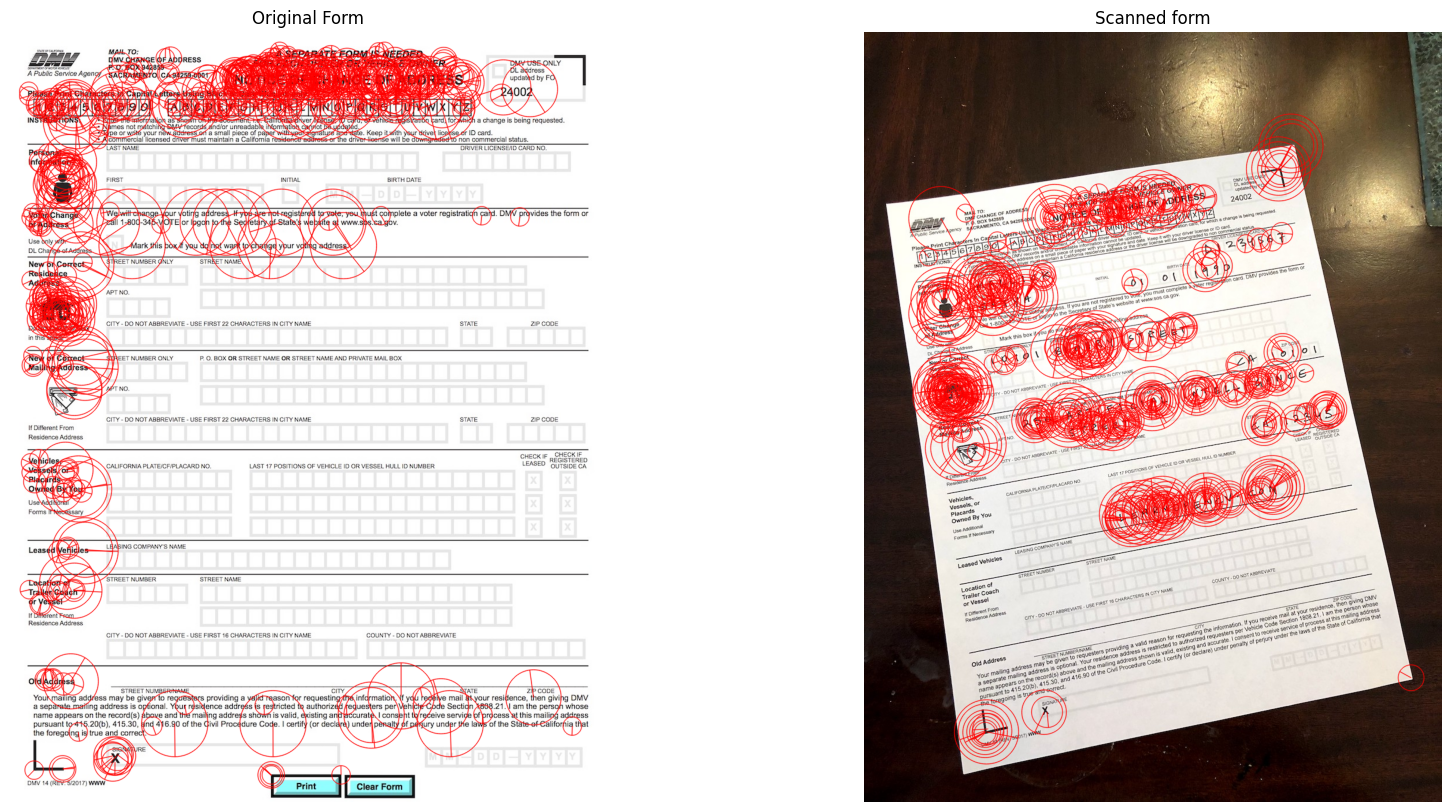

In [5]:
'''
Find Key points in both the images
'''

im1_gray = cv2.cvtColor(im1, cv2.COLOR_RGB2GRAY)
im2_gray = cv2.cvtColor(im2, cv2.COLOR_RGB2GRAY)


# Detect the features and compute the descriptors
MAX_NUM_FEATURES = 500
orb = cv2.ORB_create(MAX_NUM_FEATURES) # Create ORB Objects with maximum number of feautures


# Descriptor stors encoded visula charcteristics for the respective keypoints

# For every keypoint detected in an image, there is a corresponding descriptor computed to describe the local image patch around that keypoint. These descriptors form a list or array, where each descriptor corresponds to a specific keypoint.

# mask: This is an optional parameter that specifies a region of interest (ROI) within the image where keypoints should be detected. If you provide a mask, keypoints will only be detected within the non-zero region of the mask. If you don't want to use a mask, you can pass None.

keypoints1, descriptors1 = orb.detectAndCompute(im1_gray, None)
keypoints2, descriptors2= orb.detectAndCompute(im2_gray, None)


# Display
im1_display = cv2.drawKeypoints(im1, keypoints1, outImage=np.array([]), color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

im2_display = cv2.drawKeypoints(im2, keypoints=keypoints2, outImage=np.array([]), color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.figure(figsize=[20, 10])

plt.subplot(121)
plt.axis('off')
plt.imshow(im1_display)
plt.title("Original Form")

plt.subplot(122)
plt.axis("off")
plt.imshow(im2_display)
plt.title("Scanned form")



#


In [27]:

# Match Key points in the two images

# Match Features 
matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors1, descriptors2, None)

# Sort matches by score
# Lambda is just a anonymous function which returns x.disnatce i distances of invidual matches, reverse is asc or dsc order.
matches = sorted(matches, key=lambda x: x.distance)
# Remove not so good mathces 
# Top - 10% best mactehs choosen
numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]



Text(0.5, 1.0, 'Original Form')

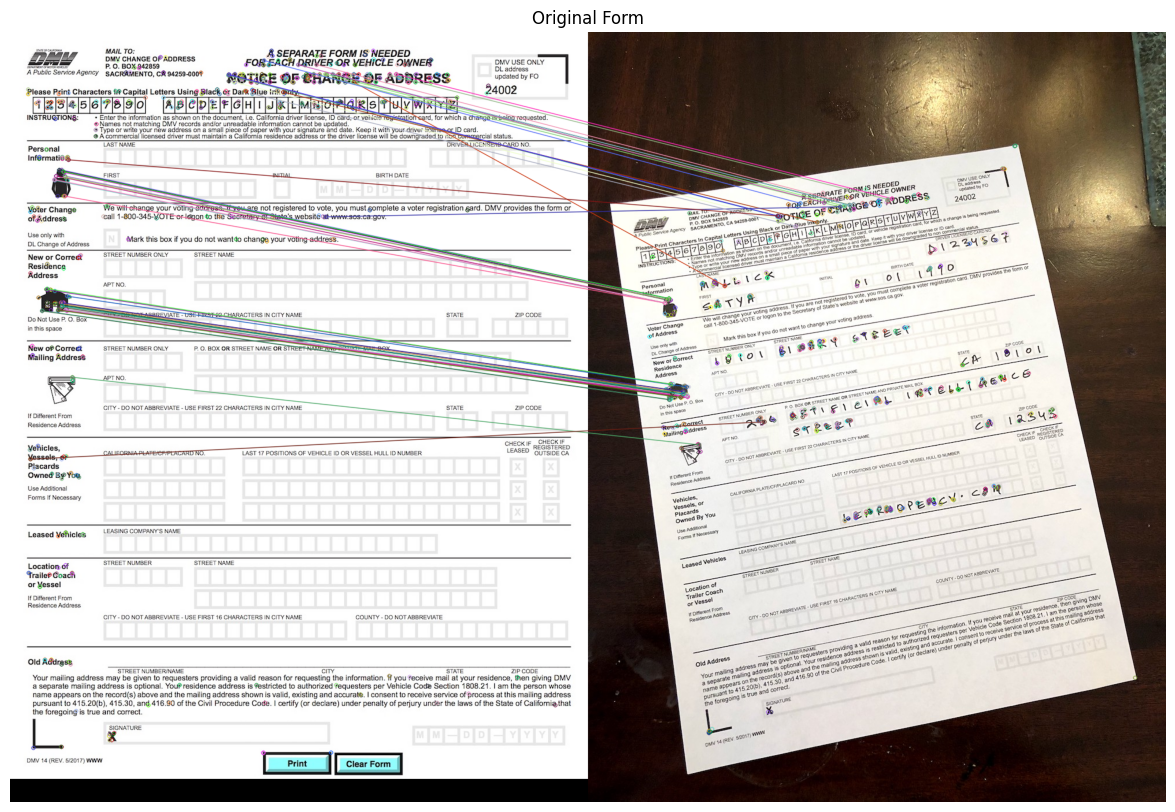

In [28]:


# Draw the top matches

im_matches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)

plt.figure(figsize=[40, 10])

plt.imshow(im_matches)
plt.axis('off')
plt.title("Original Form")



In [31]:

# Find Homography

# Extract location of good points
# Normal synatx to create a two diemnsional array (rows, column)
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)


for i, match in enumerate(matches) :
    points1[i, :]= keypoints1[match.queryIdx].pt
    points2[i,:]= keypoints2[match.trainIdx].pt



# h: The homography  matrix H is returned by the function cv2.findHomography() if it succeeds in finding
# mask :  A mask indicating which points were outliers and iliers. This can be used for further analysis
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)







Text(0.5, 1.0, 'Scanned Form')

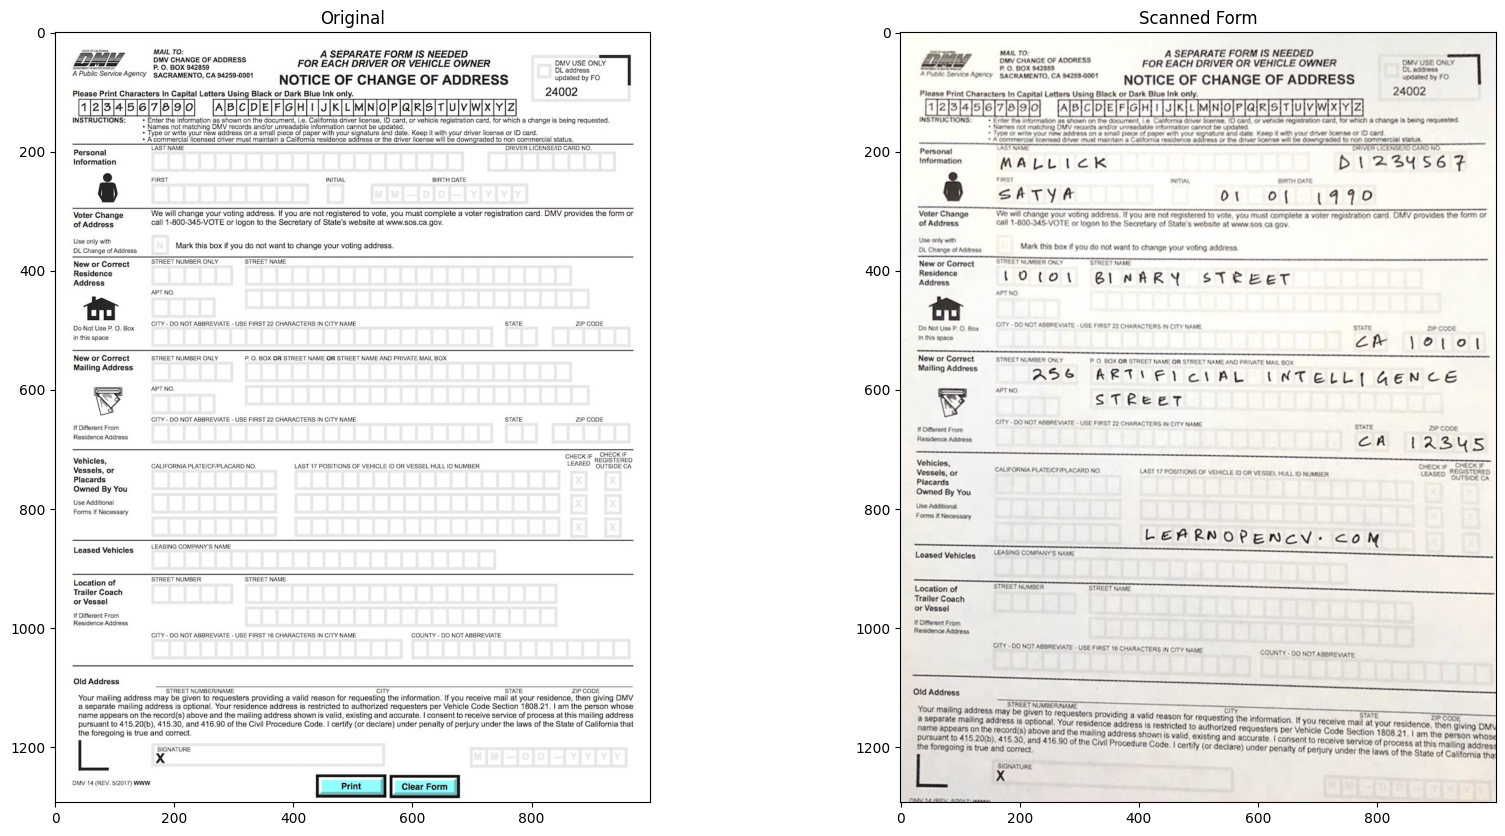

In [34]:

# Wrap image

height, width, channels = im1.shape
im2_reg = cv2.warpPerspective(im2, h, (width, height))



# plot

plt.figure(figsize=[20, 10])

plt.subplot(121)
plt.imshow(im1)
plt.title("Original")

plt.subplot(122)
plt.imshow(im2_reg)
plt.title("Scanned Form")
